<a href="https://colab.research.google.com/github/andresrico87/andresrico87/blob/main/Ejercicio_3_de_Deep_Learning_con_gradio_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Universidad El Bosque**

**Maestria en Estadistica Aplicada y Ciencia de Datos**

**DEEP LEARNING**

**Ejercicio 3 del curso: Deep Learning I**

**Presentado por:**

**ANDRES MORA** 

**GUSTAVO CAMARGO** 

**DANIEL DONADO**  

**ANDRES ANTONIO RICO LOPEZ**

**DAVID ALEJANDRO IBARRA PARADA**

# Ejercicio 3 de Deep Learning con gradio
###  best ways to share your machine learning model, API!!

In [1]:
import tensorflow as tf
!pip install gradio
import gradio as gr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 

## Clasificacion

In [2]:
# Use Resnet50 pre-entrenado para realizar clasificacion. Use include_top True!
#base_model = tf.keras.applications.resnet50.#Complete el codigo
# Cargar el modelo pre-entrenado ResNet50 con include_top=True para clasificación
base_model = tf.keras.applications.ResNet50(include_top=True, weights='imagenet')

# Crear una interfaz Gradio para recibir una imagen como entrada y predecir la 
#clase con ResNet50
def clasificar_imagen(imagen):
    # Preprocesar la imagen de entrada
    img = tf.keras.preprocessing.image.load_img(imagen, target_size=(224, 224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = tf.keras.applications.resnet50.preprocess_input(img)
    img = tf.expand_dims(img, axis=0)

    # Realizar la predicción utilizando el modelo ResNet50 pre-entrenado
    predicciones = base_model.predict(img)
    clase_predicha = tf.keras.applications.resnet50.decode_predictions(predicciones, top=1)[0][0][1]
    return clase_predicha

# Definir la interfaz de entrada y salida para Gradio
interfaz_entrada = gr.inputs.Image(type='filepath', label='Imagen de entrada')
interfaz_salida = gr.outputs.Textbox(label='Clase predicha')

# Crear la interfaz Gradio
interfaz_gradio = gr.Interface(
    fn=clasificar_imagen,
    inputs=interfaz_entrada,
    outputs=interfaz_salida,
    title='Clasificación de imágenes con ResNet50',
    description='Utiliza un modelo ResNet50 pre-entrenado para clasificar imágenes.',
    theme='default'
)

# Lanzar la interfaz Gradio
interfaz_gradio.launch()


102967424/102967424 [==============================] - 1s 0us/step


/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [3]:
def classify_image(inp):
    x = inp.reshape((-1, 224, 224, 3))
    x = tf.keras.applications.resnet50.preprocess_input(x) #Completecodigo: incluya capa de preprocesamiento de resnet50
    results =base_model.predict(x,verbose=0)
    list_pred = tf.keras.applications.resnet50.decode_predictions(results, top=5)#Completecodigo: incluya capa de decode de resnet50, best top k=5
    dic_={idx[1]:float(idx[2])  for idx in list_pred[0]}
    return dic_

In [4]:
## Use la interface de Gradio con varias imagenes!!

gr.Interface(fn=classify_image, 
             inputs=gr.Image(shape=(224, 224), source="upload"),
             outputs=gr.Label()).launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ef04979c968b899d54.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


## Mejorar Resolucion de las imagenes

In [5]:
import tensorflow_hub as hub
import tensorflow as tf
from PIL import Image
import numpy as np
model = hub.load("https://tfhub.dev/captain-pool/esrgan-tf2/1")
path_fig = tf.keras.utils.get_file('image.jpg', 'https://upload.wikimedia.org/wikipedia/commons/5/5a/Canis_lupus_265b.jpg', cache_dir='./')


114743/114743 [==============================] - 0s 1us/step


In [6]:
x = tf.keras.utils.load_img(path_fig)
x = tf.keras.utils.img_to_array(x) ##completar codigo: convierta la imagen a array con keras.utils
low_resolution_image = tf.expand_dims(x, axis=0) ##completar codigo: Agregue la dimension del batch con keras.utils
low_resolution_image = tf.cast(low_resolution_image, tf.float32)
super_resolution = model(low_resolution_image)

In [7]:
print("resolution original {} pixeles, resolution final {} pixeles".format(x.shape[0],super_resolution.shape[1]))

resolution original 768 pixeles, resolution final 3072 pixeles


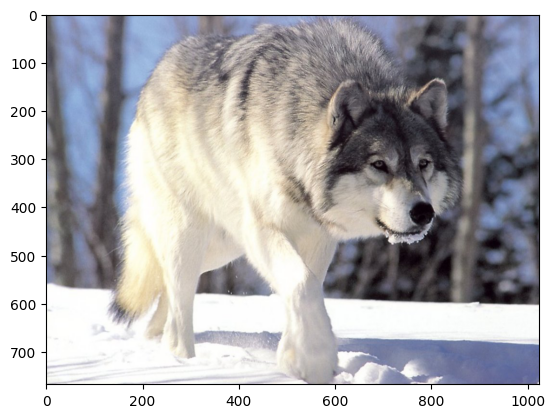

In [8]:
from PIL import Image
import matplotlib.pyplot as plt
plt.imshow(Image.open(path_fig))

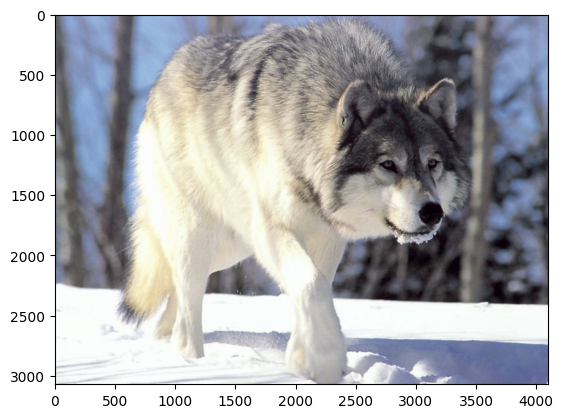

In [9]:
plt.imshow(tf.cast(tf.clip_by_value(super_resolution[0], 0, 255), tf.uint8))

In [10]:
def High_resolution_images(inp):
    x = tf.expand_dims(inp, axis=0) # expand the dimension of the image (inp) for the batch
    low_resolution_image = tf.cast(x, tf.float32)
    super_resolution = model(low_resolution_image)
    return tf.cast(tf.clip_by_value(super_resolution[0], 0, 255), tf.uint8).numpy()

In [11]:
## Use la interface de Gradio con varias imagenes e incremente su resolucion!!

gr.Interface(fn=High_resolution_images, 
             inputs=gr.Image(),
             outputs="image").launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>